In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [40]:
df=pd.read_csv(r"C:\Users\jagad\Downloads\diabetes_prediction_dataset.csv (1).zip")

In [41]:
encoder=OneHotEncoder(sparse_output=False,drop='first').set_output(transform='pandas')
scaler=StandardScaler()

In [42]:
Nominal_Columns=['gender','smoking_history']
Nominal_transformed_df=encoder.fit_transform(df[Nominal_Columns])
df=pd.concat([df,Nominal_transformed_df],axis=1).drop(columns=Nominal_Columns)

In [43]:
scaling_column=['age','bmi','HbA1c_level','blood_glucose_level']
scaler=StandardScaler()
df[scaling_column]=scaler.fit_transform(df[scaling_column])

In [44]:
X=df.drop(columns=['diabetes'])
y=df['diabetes']

In [46]:
y

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: diabetes, Length: 100000, dtype: int64

In [53]:
X_train,X_test,y_train,y_test=train_test_split(X,y,
                                              test_size=0.33,random_state=42,
                                              stratify=y)

In [55]:
xgb= XGBClassifier()

In [57]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [59]:
predictions = xgb.predict(X_test)

In [61]:
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [63]:
xgb.classes_

array([0, 1])

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     30195
           1       0.95      0.70      0.81      2805

    accuracy                           0.97     33000
   macro avg       0.96      0.85      0.90     33000
weighted avg       0.97      0.97      0.97     33000

recall score0.7033868092691622


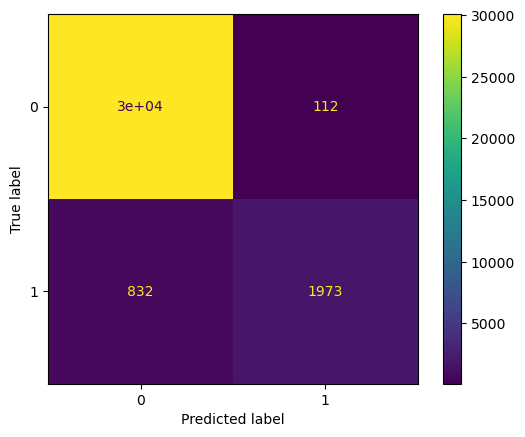

In [69]:
print(classification_report(y_test,predictions))
print(f"recall score{recall_score(y_test,predictions)}")
cm = confusion_matrix(y_test, predictions ,labels=xgb.classes_)
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb.classes_)
cm_disp.plot()